# IA340 Mini Project
**Project Title:** Crash Data in Arizona

## Research Question
How do crash frequency and severity change by time of day and day of the week?

## Data Documentation

- **Source:** https://catalog.data.gov/dataset/1-08-crash-data-report-detail-498c3
- **Description:** Tempe, Arizona Driver Crash and Accident Data, 2012-2024
- **Time Period:** 2015-2025
- **Reason for Choice:** Matches my interest in public safety

## Import Data

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia340-2025-fall-10dnfioakvitor95/1.08_Crash_Data_Report_(detail).csv') #loads the data from s3
df.head() #Shows the first 5 rows

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
0,-111.95221,33.42191,1,2598369.0,2012/01/01 07:25:00+00,2012.0,University Dr,Hardy Dr,0.000,Intersection Non Interchange,...,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.42191,-111.95221
1,-111.93769,33.42319,2,2593420.0,2012/01/01 11:45:00+00,2012.0,7th St,Myrtle Ave,139.920,Not Junction Related,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.42319,-111.93769
2,-111.89196,33.41842,3,2588493.0,2012/01/01 18:07:00+00,2012.0,Price Rd,Orange St,0.000,Intersection Interchange,...,Driver,31.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.41842,-111.89196
3,-111.94791,33.41779,4,2584449.0,2012/01/02 00:03:00+00,2012.0,11th St,Judd St,200.112,Not Junction Related,...,Driverless,NaN,NaN,East,Properly Parked,NaN,NaN,NaN,33.41779,-111.94791
4,-111.92847,33.34956,5,2592211.0,2012/01/02 00:12:00+00,2012.0,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,...,Driver,20.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.34956,-111.92847


### Markdown
- **Import:** Imported the dataset through S3 and showed the first five rows to make sure it was successfully imported.

## Clean Data

In [2]:
df.info() # shows the data types and number of null values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51305 entries, 0 to 51304
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    51162 non-null  float64
 1   Y                    51162 non-null  float64
 2   OBJECTID             51305 non-null  int64  
 3   Incidentid           51304 non-null  float64
 4   DateTime             51304 non-null  object 
 5   Year                 51304 non-null  float64
 6   StreetName           51282 non-null  object 
 7   CrossStreet          50817 non-null  object 
 8   Distance             51303 non-null  float64
 9   JunctionRelation     51303 non-null  object 
 10  Totalinjuries        51303 non-null  float64
 11  Totalfatalities      51303 non-null  float64
 12  Injuryseverity       51303 non-null  object 
 13  Collisionmanner      51303 non-null  object 
 14  Lightcondition       51303 non-null  object 
 15  Weather              51303 non-null 

In [3]:
df.describe

<bound method NDFrame.describe of                 X          Y  OBJECTID  Incidentid                DateTime  \
0     -111.952210  33.421910         1   2598369.0  2012/01/01 07:25:00+00   
1     -111.937690  33.423190         2   2593420.0  2012/01/01 11:45:00+00   
2     -111.891960  33.418420         3   2588493.0  2012/01/01 18:07:00+00   
3     -111.947910  33.417790         4   2584449.0  2012/01/02 00:03:00+00   
4     -111.928470  33.349560         5   2592211.0  2012/01/02 00:12:00+00   
...           ...        ...       ...         ...                     ...   
51300 -111.939524  33.386046     51301   4155893.0  2024/03/09 07:44:00+00   
51301 -111.972540  33.409359     51302   4154752.0  2024/03/11 20:30:00+00   
51302 -111.926385  33.435558     51303   4155884.0  2024/03/14 13:15:00+00   
51303 -111.926404  33.435576     51304   4155885.0  2024/03/14 13:20:00+00   
51304 -111.909869  33.436621     51305   4155890.0  2024/03/15 07:11:00+00   

         Year             Str

In [4]:
df.isnull().sum() #Displaying how many missing values there are in the dataset

X                       143
Y                       143
OBJECTID                  0
Incidentid                1
DateTime                  1
Year                      1
StreetName               23
CrossStreet             488
Distance                  2
JunctionRelation          2
Totalinjuries             2
Totalfatalities           2
Injuryseverity            2
Collisionmanner           2
Lightcondition            2
Weather                   2
SurfaceCondition          2
Unittype_One              2
Age_Drv1                 49
Gender_Drv1             930
Traveldirection_One       2
Unitaction_One            2
Violation1_Drv1          49
AlcoholUse_Drv1          49
DrugUse_Drv1             49
Unittype_Two           3389
Age_Drv2               4758
Gender_Drv2            4858
Traveldirection_Two    3389
Unitaction_Two         3389
Violation1_Drv2        4758
AlcoholUse_Drv2        4758
DrugUse_Drv2           4758
Latitude                143
Longitude               143
dtype: int64

In [5]:
df = df.dropna() #Drops the null values
df.isnull().sum() #Checks to see if there are any null values left

X                      0
Y                      0
OBJECTID               0
Incidentid             0
DateTime               0
Year                   0
StreetName             0
CrossStreet            0
Distance               0
JunctionRelation       0
Totalinjuries          0
Totalfatalities        0
Injuryseverity         0
Collisionmanner        0
Lightcondition         0
Weather                0
SurfaceCondition       0
Unittype_One           0
Age_Drv1               0
Gender_Drv1            0
Traveldirection_One    0
Unitaction_One         0
Violation1_Drv1        0
AlcoholUse_Drv1        0
DrugUse_Drv1           0
Unittype_Two           0
Age_Drv2               0
Gender_Drv2            0
Traveldirection_Two    0
Unitaction_Two         0
Violation1_Drv2        0
AlcoholUse_Drv2        0
DrugUse_Drv2           0
Latitude               0
Longitude              0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45245 entries, 0 to 51297
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    45245 non-null  float64
 1   Y                    45245 non-null  float64
 2   OBJECTID             45245 non-null  int64  
 3   Incidentid           45245 non-null  float64
 4   DateTime             45245 non-null  object 
 5   Year                 45245 non-null  float64
 6   StreetName           45245 non-null  object 
 7   CrossStreet          45245 non-null  object 
 8   Distance             45245 non-null  float64
 9   JunctionRelation     45245 non-null  object 
 10  Totalinjuries        45245 non-null  float64
 11  Totalfatalities      45245 non-null  float64
 12  Injuryseverity       45245 non-null  object 
 13  Collisionmanner      45245 non-null  object 
 14  Lightcondition       45245 non-null  object 
 15  Weather              45245 non-null  obje

In [7]:
df = pd.read_csv("s3://ia340-2025-fall-10dnfioakvitor95/1.08_Crash_Data_Report_(detail).csv")
num_duplicates = df.duplicated().sum()
print(f"Number of exact duplicate rows found: {num_duplicates}")

Number of exact duplicate rows found: 0


In [8]:
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

int_cols = ['OBJECTID', 'Year', 'Incidentid', 'Totalinjuries', 'Totalfatalities']

for col in int_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

age_cols = ['Age_Drv1', 'Age_Drv2']
for col in age_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    df.loc[df[col] == 255.0, col] = pd.NA
    
    df[col] = df[col].astype('Int64')

In [9]:
negative_counts = df[(df['Totalinjuries'] < 0) | (df['Totalfatalities'] < 0)].shape[0]

gender_counts_1 = df['Gender_Drv1'].value_counts(dropna=False).to_dict()
gender_counts_2 = df['Gender_Drv2'].value_counts(dropna=False).to_dict()

alcohol_counts_1 = df['AlcoholUse_Drv1'].value_counts(dropna=False).to_dict()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51305 entries, 0 to 51304
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   X                    51162 non-null  float64            
 1   Y                    51162 non-null  float64            
 2   OBJECTID             51305 non-null  Int64              
 3   Incidentid           51304 non-null  Int64              
 4   DateTime             51304 non-null  datetime64[ns, UTC]
 5   Year                 51304 non-null  Int64              
 6   StreetName           51282 non-null  object             
 7   CrossStreet          50817 non-null  object             
 8   Distance             51303 non-null  float64            
 9   JunctionRelation     51303 non-null  object             
 10  Totalinjuries        51303 non-null  Int64              
 11  Totalfatalities      51303 non-null  Int64              
 12  Injuryseverity    

In [11]:
df = df.dropna() #Drops the null values
df.isnull().sum() #Checks to see if there are any null values left

X                      0
Y                      0
OBJECTID               0
Incidentid             0
DateTime               0
Year                   0
StreetName             0
CrossStreet            0
Distance               0
JunctionRelation       0
Totalinjuries          0
Totalfatalities        0
Injuryseverity         0
Collisionmanner        0
Lightcondition         0
Weather                0
SurfaceCondition       0
Unittype_One           0
Age_Drv1               0
Gender_Drv1            0
Traveldirection_One    0
Unitaction_One         0
Violation1_Drv1        0
AlcoholUse_Drv1        0
DrugUse_Drv1           0
Unittype_Two           0
Age_Drv2               0
Gender_Drv2            0
Traveldirection_Two    0
Unitaction_Two         0
Violation1_Drv2        0
AlcoholUse_Drv2        0
DrugUse_Drv2           0
Latitude               0
Longitude              0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45061 entries, 0 to 51297
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   X                    45061 non-null  float64            
 1   Y                    45061 non-null  float64            
 2   OBJECTID             45061 non-null  Int64              
 3   Incidentid           45061 non-null  Int64              
 4   DateTime             45061 non-null  datetime64[ns, UTC]
 5   Year                 45061 non-null  Int64              
 6   StreetName           45061 non-null  object             
 7   CrossStreet          45061 non-null  object             
 8   Distance             45061 non-null  float64            
 9   JunctionRelation     45061 non-null  object             
 10  Totalinjuries        45061 non-null  Int64              
 11  Totalfatalities      45061 non-null  Int64              
 12  Injuryseverity       45

### Markdown
- **Missing Values:** There were about 6000 rows with null data that were dropped, leaving 45061 rows left.
- **Duplicates:** There are no duplicate rows that need to be dropped.
- **Fix Datatypes:** The Datetime column was changed from an object to a datetime64[ns, UTC], the count and ID columns were changed to an integer, the 255 code (unknown/not reported) in the Age category was replaced with pd.NA and converted to an integer.
- **Validity Check:** Checked to see if any negative fatalities were recorded, and that the gender column had the standard categories (male and female).

## Process/Aggregate Data

In [13]:
df['DayOfWeek'] = df['DateTime'].dt.day_name()

df['HourOfDay'] = df['DateTime'].dt.hour

crash_analysis_table = df.groupby(['DayOfWeek', 'HourOfDay']).agg(
    CrashCount=('Incidentid', 'size'), 
    TotalInjuries=('Totalinjuries', 'sum'), 
    AvgInjuries=('Totalinjuries', 'mean') 
).reset_index()
print(crash_analysis_table)

     DayOfWeek  HourOfDay  CrashCount  TotalInjuries  AvgInjuries
0       Friday          0         899            504     0.560623
1       Friday          1         559            290     0.518784
2       Friday          2         339            168     0.495575
3       Friday          3         212             98     0.462264
4       Friday          4         213             99     0.464789
..         ...        ...         ...            ...          ...
163  Wednesday         19         464            214     0.461207
164  Wednesday         20         474            235     0.495781
165  Wednesday         21         517            239     0.462282
166  Wednesday         22         646            325     0.503096
167  Wednesday         23         761            388     0.509855

[168 rows x 5 columns]


### Markdown
- **New Variable/Table:** The new variable helps answer the question by aggregating the individual crash records into a structured summary based on DayOfWeek and HourOfDay. This aggregation directly measures crash frequency using CrashCount and crash severity using AvgInjuries (the average number of injuries per crash) for every specific 1-hour time slot of the week, enabling easy identification of time-based risk patterns.

## Query Data

In [14]:
high_severity_filter = (df['Totalfatalities'] >= 1) | (df['Totalinjuries'] >= 3)
filtered_df = df[high_severity_filter]

results_df = filtered_df[[
    'DateTime',
    'Year',
    'Totalinjuries',
    'Totalfatalities',
    'Injuryseverity',
    'Collisionmanner',
    'Age_Drv1',
    'AlcoholUse_Drv1'
]].copy()

results_df = results_df.sort_values(
    by=['Totalfatalities', 'Totalinjuries'],
    ascending=[False, False]
)
results_df.head()

,DateTime,Year,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Age_Drv1,AlcoholUse_Drv1
25990,2017-10-03 02:44:00+00:00,2017,1,3,Fatal,Head On,57,Alcohol
6830,2013-08-17 21:22:00+00:00,2013,3,2,Fatal,Sideswipe Same Direction,32,No Apparent Influence
33072,2019-02-21 14:40:00+00:00,2019,1,2,Fatal,Left Turn,20,No Apparent Influence
21277,2016-10-17 14:51:00+00:00,2016,0,2,Fatal,Left Turn,43,Alcohol
42346,2021-11-18 02:10:00+00:00,2021,0,2,Fatal,Other,36,No Apparent Influence


### Markdown
- **New Query:** It isolates the most catastrophic events (fatalities and high injury counts) from the much larger volume of minor crashes. By focusing on these high-severity incidents, it is possible to pinpoint the specific contributing factors (e.g., alcohol use, collision type) that have the greatest impact.

## Data Visualizations

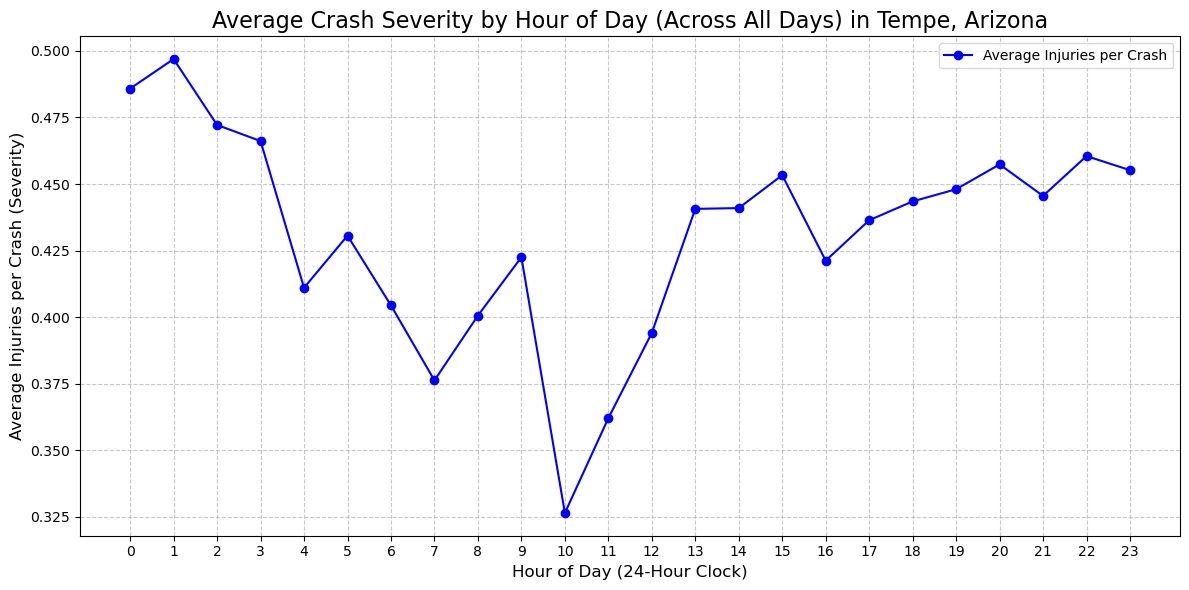

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

hourly_severity = crash_analysis_table.groupby('HourOfDay')['AvgInjuries'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(
    hourly_severity['HourOfDay'],
    hourly_severity['AvgInjuries'],
    marker='o',
    linestyle='-',
    color='blue',
    label='Average Injuries per Crash'
)

plt.title('Average Crash Severity by Hour of Day (Across All Days) in Tempe, Arizona', fontsize=16)
plt.xlabel('Hour of Day (24-Hour Clock)', fontsize=12)
plt.ylabel('Average Injuries per Crash (Severity)', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

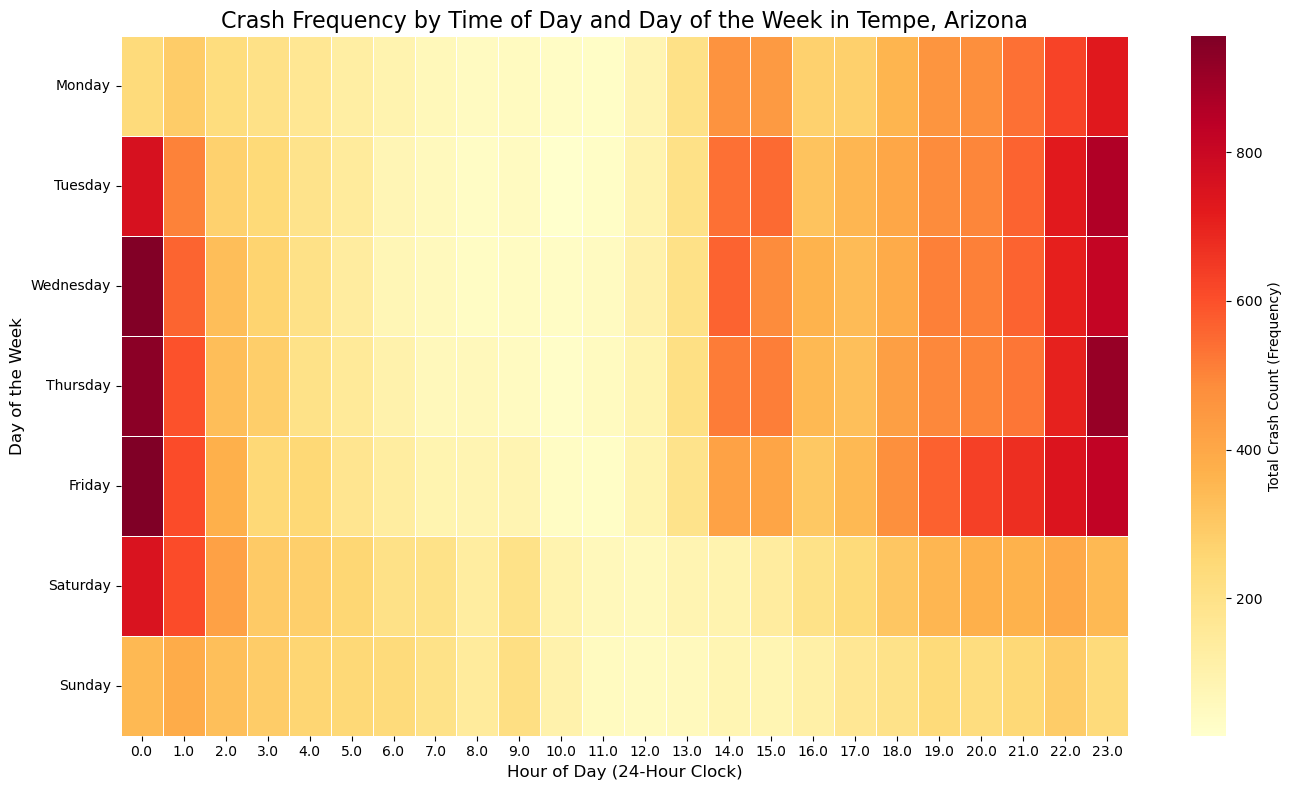

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("s3://ia340-2025-fall-10dnfioakvitor95/1.08_Crash_Data_Report_(detail).csv")
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')
df['Totalinjuries'] = pd.to_numeric(df['Totalinjuries'], errors='coerce')

df['DayOfWeek'] = df['DateTime'].dt.day_name()
df['HourOfDay'] = df['DateTime'].dt.hour

crash_analysis_table = df.groupby(['DayOfWeek', 'HourOfDay']).agg(
    CrashCount=('Incidentid', 'size'), 
    TotalInjuries=('Totalinjuries', 'sum'), 
    AvgInjuries=('Totalinjuries', 'mean') 
).reset_index()

crash_analysis_table.dropna(subset=['DayOfWeek'], inplace=True)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crash_analysis_table['DayOfWeek'] = pd.Categorical(
    crash_analysis_table['DayOfWeek'], 
    categories=day_order, 
    ordered=True
)

frequency_pivot = crash_analysis_table.pivot_table(
    index='DayOfWeek',
    columns='HourOfDay',
    values='CrashCount'
)

plt.figure(figsize=(14, 8))
sns.heatmap(
    frequency_pivot,
    cmap="YlOrRd",
    annot=False,
    fmt=".0f",
    linewidths=.5,
    cbar_kws={'label': 'Total Crash Count (Frequency)'}
)
plt.title('Crash Frequency by Time of Day and Day of the Week in Tempe, Arizona', fontsize=16)
plt.xlabel('Hour of Day (24-Hour Clock)', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Markdown
- **Chart 1:** This line plot addresses the severity component by illustrating the average number of injuries per crash, revealing how dangerous the crashes are based purely on the hour of the day. The plot shows a critical, inverse trend: crash severity is lowest during the high-frequency rush hours but reaches its maximum in the late-night and early-morning hours, with the highest point occurring between 2 AM and 4 AM. This high severity during low-frequency periods suggests that the crashes that do occur during these times are far more catastrophic, likely involving higher speeds. Consequently, while crashes are most frequent during the day, the highest risk to human life (severity) occurs during the late-night hours when dangerous driving behaviors are most prevalent.
  
- **Chart 2:** This heatmap directly addresses the crash frequency component by visualizing the total crash counts across all 24 hours and 7 days of the week, identifying when the highest volume of incidents occurs. The data shows distinct, high-frequency peaks corresponding to the typical commuting hours on weekdays, specifically from 7:00 AM to 9:00 AM and again from 3:00 PM to 6:00 PM. Looking across the days, the frequency is consistently highest on Friday, especially in the afternoon and evening, suggesting that end-of-week travel significantly contributes to the total crash volume. On the other hand, the lowest crash frequency is reliably observed during the overnight period, specifically from 12 AM to 5 AM, across all days. Therefore, crash frequency is strongly driven by traffic volume, exhibiting a clear cyclical pattern with peaks during rush hour and a distinct weekly spike on Fridays.